In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
import pandas as pd
np.random.seed(1234)

1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.
3. thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.
4. chỉ dùng 10 dữ liệu cho tập train, fit model bậc 9 và dùng rigde regression để giảm overfitting

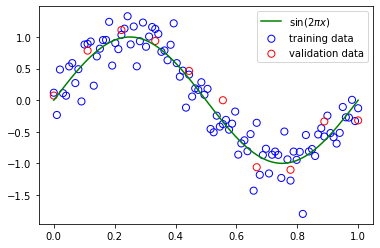

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 100, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")

plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [3]:
def mse(truth, predict):
    truth = np.array(truth)
    predict = np.array(predict)
    return np.mean((truth - predict) ** 2)

In [4]:
dict1 = {'x_train':x_train, 'y_train' :y_train}
train_df = pd.DataFrame(dict1)
train_df.head()

,x_train,y_train
0,0.000000,0.117859
1,0.010101,-0.234320
2,0.020202,0.484769
3,0.030303,0.111088
4,0.040404,0.071001


In [5]:
dict2 = {'x_val':x_val, 'y_val' :y_val}
val_df = pd.DataFrame(dict2)
val_df.head()

,x_val,y_val
0,0.000000,0.072801
1,0.111111,0.784421
2,0.222222,1.110706
3,0.333333,0.937349
4,0.444444,0.463092


In [6]:
class L2:
    def __init__(self, df, target, lamb):
        self.df = df
        self.target = target
        self.lamb = lamb

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x) + self.lamb*np.identity(x.shape[1])).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

    def mse(self):
        newdf = self.add_predict_column()
        return np.mean((newdf['predict'] - newdf[self.target]) ** 2)

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def print_model(self):
        feature = (self.df.loc[:, self.df.columns != self.target])
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),2), feature.columns[i-1], '+', end=' ')
        print(round(float(w[0][0]),2))

In [7]:
# bac 9
train_df9 = train_df.copy()
train_df9['x^2'] = x_train ** 2
train_df9['x^3'] = x_train ** 3
train_df9['x^4'] = x_train ** 4
train_df9['x^5'] = x_train ** 5
train_df9['x^6'] = x_train ** 6
train_df9['x^7'] = x_train ** 7
train_df9['x^8'] = x_train ** 8
train_df9['x^9'] = x_train ** 9

train_df9.head()

,x_train,y_train,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9
0,0.000000,0.117859,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.010101,-0.234320,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18
2,0.020202,0.484769,0.000408,0.000008,1.665633e-07,3.364914e-09,6.797807e-11,1.373294e-12,2.774332e-14,5.604711e-16
3,0.030303,0.111088,0.000918,0.000028,8.432265e-07,2.555232e-08,7.743127e-10,2.346402e-11,7.110309e-13,2.154639e-14
4,0.040404,0.071001,0.001632,0.000066,2.665012e-06,1.076773e-07,4.350596e-09,1.757817e-10,7.102290e-12,2.869612e-13


In [8]:
model9 = L2(train_df9, 'y_train', 0)
print(model9.find_coefficient())
model9.print_model()

[[-1.47697658e-02]
 [ 1.05761593e+01]
 [-1.06091739e+02]
 [ 8.88521628e+02]
 [-3.91118879e+03]
 [ 9.05208394e+03]
 [-1.17203829e+04]
 [ 8.46183832e+03]
 [-3.08785999e+03]
 [ 4.12334562e+02]]
y = 10.58 x_train + -106.09 x^2 + 888.52 x^3 + -3911.19 x^4 + 9052.08 x^5 + -11720.38 x^6 + 8461.84 x^7 + -3087.86 x^8 + 412.33 x^9 + -0.01


In [9]:
w9 = model9.find_coefficient()
x9 = np.linspace(0,1,100)
y9 = w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3 + w9[4]*x9**4 + w9[5]*x9**5 + w9[6]*x9**6  + w9[7]*x9**7 + w9[8]*x9**8 + w9[9]*x9**9 + w9[0]

In [10]:
y_val_predict = w9[1]*x_val + w9[2]*x_val**2 + w9[3]*x_val**3 + w9[4]*x_val**4 + w9[5]*x_val**5 + w9[6]*x_val**6  + w9[7]*x_val**7 + w9[8]*x_val**8 + w9[9]*x_val**9 + w9[0]
y_val_predict

array([-0.01476977,  0.60622246,  1.01164967,  0.93806764,  0.33327572,
       -0.37376146, -0.8427715 , -0.95995125, -0.6192049 , -0.18356981])

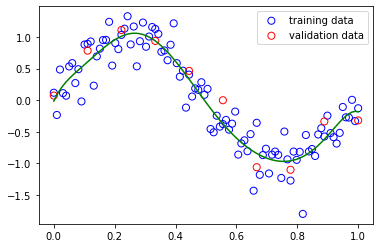

In [11]:
model9_predict = model9.add_predict_column()
plt.scatter(x_train,y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x9, y9,'g')
plt.legend()
plt.show()

In [12]:
print('MSE Training:',mse(y_train, model9_predict.predict))
print('MSE Validation:',mse(y_val, y_val_predict))

MSE Training: 0.06035615991103258
MSE Validation: 0.0371337334654429


In [13]:
np.random.seed(1234)

In [14]:
x_train2, y_train2 = create_toy_data(func, 10, 0.25)

In [15]:
dict2 = {'x_train':x_train2, 'y_train' :y_train2}
random_train_df = pd.DataFrame(dict2)
random_train_df

,x_train,y_train
0,0.000000,0.117859
1,0.111111,0.345044
2,0.222222,1.342984
3,0.333333,0.787862
4,0.444444,0.161873
5,0.555556,-0.120229
6,0.666667,-0.651128
7,0.777778,-1.143939
8,0.888889,-0.638864
9,1.000000,-0.560671


In [16]:
random_train_df9 = random_train_df.copy()
random_train_df9['x^2'] = x_train2 ** 2
random_train_df9['x^3'] = x_train2 ** 3
random_train_df9['x^4'] = x_train2 ** 4
random_train_df9['x^5'] = x_train2 ** 5
random_train_df9['x^6'] = x_train2 ** 6
random_train_df9['x^7'] = x_train2 ** 7
random_train_df9['x^8'] = x_train2 ** 8
random_train_df9['x^9'] = x_train2 ** 9

random_train_df9.head()

,x_train,y_train,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9
0,0.000000,0.117859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.111111,0.345044,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,0.222222,1.342984,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,0.333333,0.787862,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,0.444444,0.161873,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04


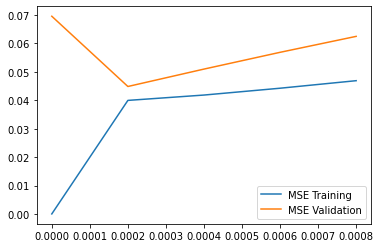

In [17]:
train_loss = {}
val_loss = {}

for a in np.arange(0, 0.001, 0.0002):
    x = L2(random_train_df9, 'y_train', a)
    x_predict = x.add_predict_column()

    train_loss[a] = mse(y_train2, x_predict.predict)
    val_loss[a] = mse(y_val, x_predict.predict)

plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'MSE Training')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'MSE Validation')
plt.legend()

In [18]:
ridge_model = L2(random_train_df9, 'y_train', 0.0002)
print(ridge_model.find_coefficient())
ridge_model.print_model()

[[  0.06498432]
 [  6.90940878]
 [-12.72330493]
 [ -5.92921879]
 [  3.0433185 ]
 [  6.70239283]
 [  6.21179629]
 [  3.24011145]
 [ -1.26057185]
 [ -6.79449757]]
y = 6.91 x_train + -12.72 x^2 + -5.93 x^3 + 3.04 x^4 + 6.7 x^5 + 6.21 x^6 + 3.24 x^7 + -1.26 x^8 + -6.79 x^9 + 0.06


In [19]:
w = ridge_model.find_coefficient()
x = np.linspace(0,1,100)
y = w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 + w[5]*x**5 + w[6]*x**6  + w[7]*x**7 + w[8]*x**8 + w[9]*x**9 + w[0]

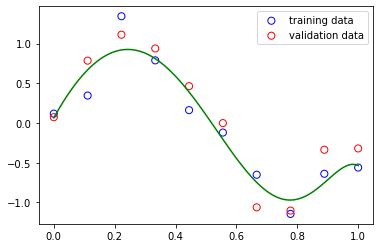

In [20]:
ridge_model_predict = ridge_model.add_predict_column()
plt.scatter(x_train2,y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x, y,'g')
plt.legend()
plt.show()

In [21]:
print('MSE Training:',mse(y_train2, ridge_model_predict.predict))
print('MSE Validation:',mse(y_val, ridge_model_predict.predict))

MSE Training: 0.03995758860845557
MSE Validation: 0.04485194022672193
